# Importing libraries

In [45]:
# Importing all neccesary libraries
import math # Maths
import pandas as pd # Pandas
import numpy as np # Numpy
import matplotlib.pyplot as plt # Matplotlib - for ploting
from matplotlib.ticker import MultipleLocator # Matplotlib - for defining axis spacing


# Question 1

A piece of paper is 1mm thick. Assuming you can fold it as many times as you want, how many folds would it take to exceed the height of Mount Everest at 8,848 m?

In [46]:
# Innitialising constants
mount_everest = 8848 # Hieght of Mount Everest 
paper = 0.001 # Paper thickness in m
number_of_folds = 0

# Calculation
while paper <= mount_everest : # While loop to calculate number of fold
    paper *= 2 # Folding the paper
    number_of_folds += 1 # Calculating the number of folds

# Result
print("Number of folds: ") # Output number of fold
print(number_of_folds)


Number of folds: 
24


# Question 2

The volume of water in a reservoir decreases at an exponential rate, following v(t) = v(0)exp(-at) with a=0.1. How much time, t, does it take for the volume to decrease to less than one half of its initial volume, v(0)?


In [47]:
# Innitialising constants
v0 = 1 # Innitial volume: Let it be a unit value
a = 0.1 # Decay constant given 
vt = v0 # Volume at time t, at t = 0
t = 0 # Unit time at t = 0

# Calculation
while vt > 0.5*v0: 
    t += 1
    vt = v0*(math.exp(-1*a*t))

# Result
print("Time to decrease to less than half: ") # 
print(str(t) + " units") # 

Time to decrease to less than half: 
7 units


# Question 3 

If you deposit $100  in a bank account that offers an annualized interest rate of 5 % (compounded annually), how much money will you have after one, two, three, four and five years?


In [48]:

principal = 100 # Innitial deposit
rate = 0.05 # Yearly rate
revenue = 0 # revenue generat
years = [1,2,3,4,5]
yearly_revenue = []

for year in years :
    revenue = (principal*rate*1) + principal # Calculating interest and adding to pricipal
    principal = revenue # Reinitialising the principal
    #yearly_revenue.append(revenue)
    yearly_revenue.append(round(revenue,))
    #print(round(revenue,)) # Rounding value to 2 decimal places

print("Yearly revenue for 1st to 5th year respectively: ")
for rev in yearly_revenue: # Printing yearly revenue
    print(rev)


Yearly revenue for 1st to 5th year respectively: 
105
110
116
122
128


# Question 4 

Suppose you want to buy a car worth $20,000. A financial institution can provide a loan with a monthly interest rate of 1%. What is the monthly payment to pay off the debt in one, two and three years (rounded to the nearest )?


In [49]:
#! Use formular given in the recitation.

loan = 20000 # Loan value
rate = 0.01 # Monthly rate

years = [12,24,36] # List of years in months

monthly_payment = [] # Innitialising array for monthly pay off in 1, 2, and 3 years
#monthly_value = 0

for year in years: # Loop through years expressed in months
    # We calculate the cummulative monthly payment for given year
    for month in range(year) : # For months in year 
        loan = (rate*loan*1) + loan # Calculate cummunlative revenue for that year
    monthly_payment.append(round(loan/year)) # Extract monthly payoff from cummulative revenue and append to list 
        
print("The monthly pay off respectively in 1, 2, and 3 years: ") # Out put

for payment in monthly_payment: # Printing monthly payoffs
    print(payment)
    

The monthly pay off respectively in 1, 2, and 3 years: 
1878
1192
1137


# Question 5 

You are about to set up a new business and will invest $100,000. On day one you expect to have 100 customers and the number of customers will grow at a rate of 1% per day. If each customer provides profits of 10 dollar, how many days will it take to repay your initial investment based on cumulated profits? Plot cumulated profits per day, show initial investment and mark breakeven day.


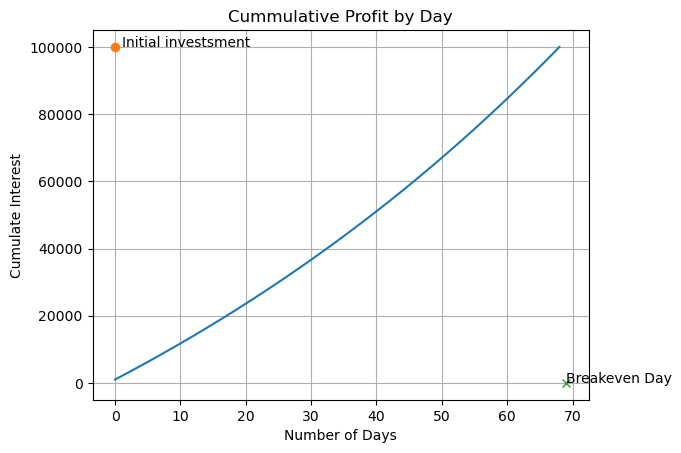

Number of days: 
69


In [50]:
capital = 100000 # Innitialising capital
customer = 100 # Innitial customer
rate = 0.01 # Innitialising rate 
interest = 0 # Innitialising interest to 0
days = 0 # Initialising day 
interests = [] # List of daily interest 

# Calculating daily customer growth and coressponding interes 
while interest < capital:
    customer += 0.01*(customer) # Setting the new value of customer after 1% increase
    # Important!!! Here, customers were rounded to whole numbers 
    interest += (math.ceil(customer))*10 # Rounding up customers to whole number for that day 
    #interest += (customer)*10 # Customers not rounded up
    interests.append(interest) # Appending cummulative daily interest to interest array
    days += 1
    
#print(days)
# print(customer)
# print(interests)

# Ploting graph
plt.plot(interests) # Ploting cummulative daily profit

#Lebelling the graph
plt.ylabel("Cumulate Interest") # Y lebel 
plt.xlabel("Number of Days") # X lebel 
plt.title("Cummulative Profit by Day") # Graph title

plt.plot([0],[100000], 'o') # Annotating innitial investment 
plt.annotate('Initial investsment', xy=(0, 100000), xytext=(1, 100000)) # Lebelling and positioning lebel

plt.plot([69],[0], 'x') # Annotating break even day 
plt.annotate('Breakeven Day', xy=(69, 0), xytext=(69, 2)) # Lebelling and positioning lebel

plt.grid(True) # Inserting grid
plt.show() # Displaying plots

print("Number of days: ") # Output
print(days) # Number of days


# Question 6 

Using data from http://bit.ly/1JJyf29 and linear interpolation, estimate the dates when the number of cases and deaths due to Ebola exceeded 100, 500, 1000, 2000 and 5000. Graph the cases and deaths (observations and interpolations) and mark the dates when thresholds were exceeded with a circle.


Death Toll Dates
2014-04-06
2014-07-05
2014-08-09
2014-09-03
2014-10-24
Case Toll Dates
2014-03-27
2014-06-13
2014-07-15
2014-08-12
2014-09-12


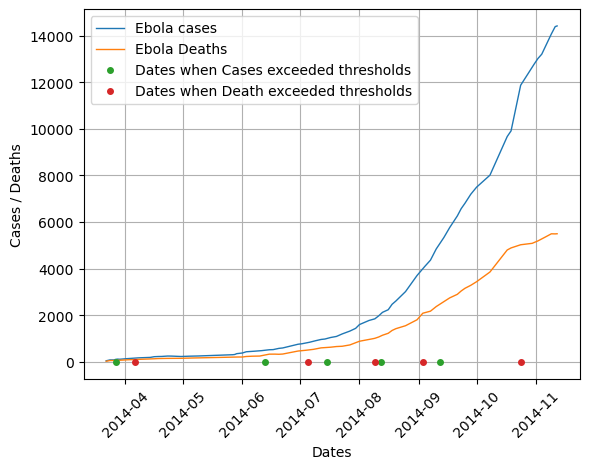

In [58]:
# Importing file 
ebola_df = pd.read_excel("ebola_download.xls") # Importing files
ebola_df = ebola_df[['Date','Cases','Death']] # Extracting required fields

# Readjusting data
date_range = pd.date_range(start=ebola_df['Date'].min(), end=ebola_df['Date'].max()) # Getting range
#ebola_df = ebola_df.reindex(date_range).reset_index() # Setting data with new range and introducing
ebola_df = ebola_df.set_index('Date').reindex(date_range).reset_index() # Setting data with new range and introducing
ebola_df = ebola_df.rename(columns={'index': 'Date'})
#ebola_df['Date'] = ebola_df['Date'].dt.date
ebola_df['Date'] = pd.to_datetime(ebola_df['Date'], format='%Y-%m-%d')

ebola_df = ebola_df.interpolate(method = 'linear') # Linear interpolation

toll_points = [100, 500, 1000, 2000, 5000] # Array of treshold toll points
toll_i = 0 # toll index for deaths
toll_j = 0 # toll index for cases

death_toll = [] # Death toll when threshold toll points were exceeded
death_toll_dates = [] # Death dates when threshold toll points were exceeded
case_toll = [] # Case toll when threshold toll points were exceeded
case_toll_dates = [] # Cases dates when threshold toll points were exceeded

#print(len(toll_points), toll_i)

# looping through rows in the data frame to indicate when toll thresholds were exceeded
for index, row in ebola_df.iterrows(): 
    #print(len(toll_points), toll_i)
    if toll_i < (len(toll_points)): # For deaths, ensure toll index is <= range of toll threshold array

        # Append first value of Dates and deaths when deaths exceeds toll thresholds value
        if row["Death"] > toll_points[toll_i] : # Check if deaths execeeds toll
            death_toll_dates.append(row["Date"]) # Append death toll date to death toll date array 
            death_toll.append(row["Death"]) # Append death toll to death toll array 
            toll_i += 1 # move index to the next toll on array
            #print(row["Date"])

    if toll_j < (len(toll_points)): # For deaths, ensure toll index is <= range of toll threshold array

        # Append first value of Dates and cases when cases exceeds toll thresholds value
        if row["Cases"] > toll_points[toll_j] : # Check if cases execeeds toll
            case_toll_dates.append(row["Date"]) # Append case toll date to case toll date array 
            case_toll.append(row["Cases"]) # Append case toll to case toll array
            toll_j += 1 # move index to the next toll on array
            #print(row["Cases"])       
    
death_toll_dates = [ts.date() for ts in death_toll_dates] # Extracting date only from time stamp
print("Death Toll Dates") # Print toll dates
for date in death_toll_dates:
    print(date)
#print(death_toll_dates[i] for i in range(len(death_toll_dates))) 
#print(death_toll)

case_toll_dates = [ts.date() for ts in case_toll_dates] # Extracting date only from time stamp
print("Case Toll Dates") # Print toll dates
for date in case_toll_dates:
    print(date)
#print(case_toll_dates) 
#print(case_toll) 

ebola_cases = ebola_df["Cases"] # Extracting ebola cases
ebola_deaths = ebola_df["Death"] # Extracting ebola deaths
ebola_date = ebola_df["Date"] # Extracting ebola dates

#ebola_df.head(5)
fig, ax = plt.subplots() # Creating subplot to introduce legends

plt.plot(ebola_date,ebola_cases,  linewidth = 1, label = "Ebola cases") # Plot of cases per day 
plt.plot(ebola_date,ebola_deaths, linewidth = 1, label = "Ebola Deaths") # Plot of deaths per day
# plt.plot(case_toll_dates,case_toll, "o", markersize = 4, label = "Cases date thresholds") # Indicating dates and cases when threshold is exceeded
# plt.plot(death_toll_dates,death_toll, "o", markersize = 4 , label = "Death dates thresholds") # Indicating dates and deaths when threshold is exceeded
plt.plot(case_toll_dates, [0,0,0,0,0], "o", markersize = 4, label = "Dates when Cases exceeded thresholds") # Indicating dates of case threshold
plt.plot(death_toll_dates,[0,0,0,0,0] , "o", markersize = 4 , label = "Dates when Death exceeded thresholds") # Indicating dates of death threshold

ax.legend() # Displaying ledgend

plt.xlabel('Dates') # X-Axis label
plt.xticks(rotation=45) # Rotate X - ticks by 45
plt.ylabel('Cases / Deaths') # Y-Axis label

plt.grid(True) # Display grid
plt.show() # Display plot


# Question 7

Using data from 2014, downloaded in the previous question, what is the average growth rate per day, as a percentage, in the number of Ebola cases and deaths?


In [52]:
# Innitialisation
daily_growth_death = [] # Daily death growth rate list
death_array = list(ebola_df['Death']) # Extracting deaths into an array

daily_growth_cases = [] # Daily cases growth rate list
case_array = list(ebola_df['Cases']) # Extracting cases into an array

for i in range(len(death_array) - 1) : # For death in death array, append daily death growth rate to list
    daily_growth_death.append(((death_array[i+1]-death_array[i])/death_array[i])*100) # Calculating and appending daily death growth rate 

for i in range(len(case_array) - 1) : # For CAses in death array, append daily case growth rate to list
    daily_growth_cases.append(((case_array[i+1]-case_array[i])/case_array[i])*100) # Calculating and appending daily case growth rate
    
    #daily_growth_mean.append()
#print(daily_growth_death)
#print(death_array)
#print(len(daily_growth),len(death_array))

# Average growth rate per day
avg_daily_growth_deaths = (sum(daily_growth_death)/len(daily_growth_death)) # Calculating average daily death growth rate
avg_daily_growth_cases = (sum(daily_growth_cases)/len(daily_growth_cases)) # Calculating average daily case growth rate


print("Average death growth rate(in %) per day(in 5 dp): ") # Output
print(round(avg_daily_growth_deaths,5)) # Displayign avereage rate

print("Average Cases growth rate(in %) per day(in 5 dp): ") # Output
print(round(avg_daily_growth_cases,5)) # Displayign avereage rate 
 

Average death growth rate(in %) per day(in 5 dp): 
2.33061
Average Cases growth rate(in %) per day(in 5 dp): 
2.50652


# Question 8

Using the same date, plot the number of deaths versus the number of cases and estimate the average ratio of Ebola deaths to cases.


Ratio of deaths to cases(5 decimal places): 
0.55855


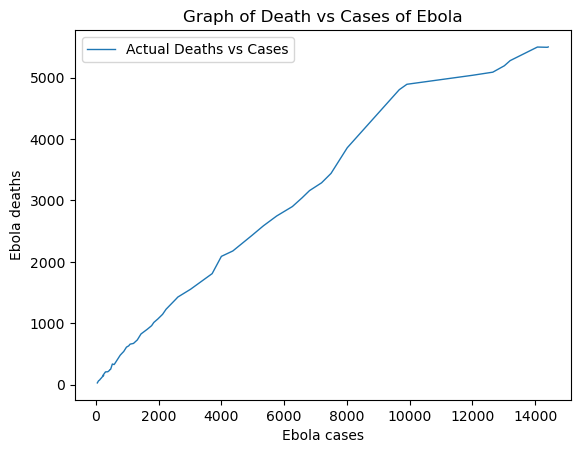

In [53]:
fig, ax = plt.subplots() # Creating subplot to introduce legends

plt.plot(ebola_cases,ebola_deaths, linewidth = 1, label = "Actual Deaths vs Cases") # Plotting ebola cases to deaths
#plt.scatter(ebola_cases,ebola_deaths, s = 0.05, label = "Actual Deaths vs Cases")

#line_eq = np.polyfit(ebola_cases, ebola_deaths,  deg = 1) # Extracting line gradient and intercept of fitted line 
#line = np.polyval(line_eq, ebola_cases) # Fitted line that dipicts ratio of deaths to cases
#plt.plot(ebola_cases, line, label = "line - Ratio of Deaths to Cases") # Ploting line with
plt.ylabel("Ebola deaths") # Y - label
plt.xlabel("Ebola cases") # X - label
plt.title("Graph of Death vs Cases of Ebola") # Graph tittle 

ax.legend() # Display ledgen

print("Ratio of deaths to cases(5 decimal places): ") # Output 
#print(round(line_eq[0], 5)) # Extracting gradient to 5 decimal places 
# Second thoughts about deaths to cases
death_to_case = []
for i in range(len(death_array)-1): 
    death_to_case.append(death_array[i]/case_array[i])
ratio = round(sum(death_to_case)/len(death_to_case), 5)
print(ratio)

# Question 9

Obtain daily prices for two ETFs called SPY and TLT which track the S&P500 index and long-term Treasury Bond. Select the adjusted closing prices. Plot the two time series during 12/31/2013 – 08/31/2015 and make them comparable by starting from prices of $100 on the first day in 12/31/2013 – 08/31/2015.


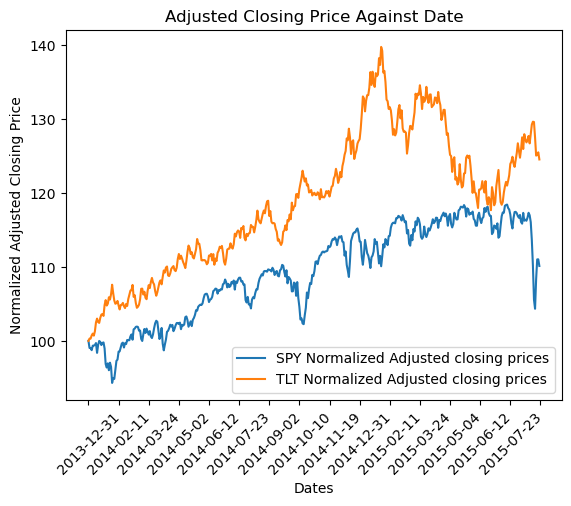

In [54]:
# Loading data 
spy_df = pd.read_csv('SPY.csv') # Extracting spy csv
tlt_df = pd.read_csv('TLT.csv') # extracting tlt csv

spy_df = spy_df[['Date','Adj Close']] # Extracting needed fields
tlt_df = tlt_df[['Date','Adj Close']] # Extracting needed fields

spy_dates = spy_df['Date'] # Extracting dates
tlt_dates = tlt_df['Date'] # Extracting dates

# Normalising the data and making normalised value begin from $100
spy_ac_init = spy_df['Adj Close'].iloc[0] # Getting innitial values of spy_df
tlt_ac_init = tlt_df['Adj Close'].iloc[0] # Getting innitial values of tlt_df

spy_df['Adj Close Normalized'] = (spy_df['Adj Close']/spy_ac_init * 100) # Normalising SPY data
tlt_df['Adj Close Normalized'] = (tlt_df['Adj Close']/tlt_ac_init * 100) # Normalising TLT data

# spy_df = spy_df[['Date','Adj Close']] # Extracting needed fields
# tlt_df = tlt_df[['Date','Adj Close']] # Extracting needed fields

fig, ax = plt.subplots() # Creating subplot to introduce legends

plt.plot(spy_dates, spy_df["Adj Close Normalized"], markeredgewidth = 0.5, label = "SPY Normalized Adjusted closing prices") # Plot tlt adjusted closing prices
plt.plot(tlt_dates, tlt_df["Adj Close Normalized"], markeredgewidth = 0.5, label = "TLT Normalized Adjusted closing prices") # Plot tlt adjusted closing prices
plt.ylabel('Normalized Adjusted Closing Price') # Y - label
plt.xlabel('Dates') # X - axis label
plt.xticks(rotation=45) # Rotating ticks to make dates more visisble 
plt.title('Adjusted Closing Price Against Date') # Title 
ax.legend()

axs = plt.gca()  # Get the current axis
axs.xaxis.set_major_locator(MultipleLocator(28)) # Space between ticks - 28 days

plt.show() # Display 


In [55]:
# # Question 9 Rough work 

# """
# Obtain daily prices for two ETFs called SPY and TLT which track the S&P500 index and long-term Treasury Bond. Select the adjusted closing prices. Plot the two time series during 12/31/2013 – 08/31/2015 and make them comparable by starting from prices of $100 on the first day in 12/31/2013 – 08/31/2015.
# """
 
# spy_df = pd.read_csv('SPY.csv') # Extracting spy csv
# tlt_df = pd.read_csv('TLT.csv') # extracting tlt csv

# spy_df = spy_df[['Date','Adj Close']] # Extracting needed fields
# tlt_df = tlt_df[['Date','Adj Close']] # Extracting needed fields

# spy_dates = spy_df['Date'] # Extracting dates
# tlt_dates = tlt_df['Date'] # Extracting dates
# spy_adj_close = spy_df['Adj Close'] # Extracting Adj Close price
# tlt_adj_close = tlt_df['Adj Close'] # Extracting Adj Close price

# fig, ax = plt.subplots() # Creating subplot to introduce legends

# plt.plot(spy_dates, spy_adj_close, markeredgewidth = 0.5, label = "SPY Adjusted closing prices") # Plot tlt adjusted closing prices
# plt.plot(tlt_dates, tlt_adj_close, markeredgewidth = 0.5, label = "TLT Adjusted closing prices") # Plot tlt adjusted closing prices
# plt.ylabel('Adjusted Closing Price') # Y - label
# plt.xlabel('Dates') # X - axis label
# plt.xticks(rotation=45) # Rotating ticks to make dates more visisble 
# plt.title('Adjusted Closing Price Against Date') # Title 
# ax.legend() # To display legend

# axs = plt.gca()  # Get the current axis
# axs.xaxis.set_major_locator(MultipleLocator(28)) # Space between ticks - 28 days

# plt.show()

#spy_df.head()
#tlt_df.head()

# Queation 10

For the ETFs on the previous question, calculate daily returns, r(t) = p(t)/p(t-1)-1, for each trading day in the same time period as above. Calculate the average, min and max daily return for each of the two ETFs during the time period and express these as
percentages.


In [56]:
# Loading data and calculating culating cumulative daily retun
spy_dly_return = spy_df["Adj Close"].pct_change() # Calculating and storing daily spy returns 
tlt_dly_return = tlt_df["Adj Close"].pct_change() # Calculating and storing daily tlt returns 

spy_dly_return = list(spy_dly_return) # converting to list 
del spy_dly_return[0] # Deleting first value which is NaN
spy_mean = sum(spy_dly_return) / len(spy_dly_return) # Mean of daily spy return
spy_max = max(spy_dly_return) # Max of daily spy return
spy_min = min(spy_dly_return) # Min of daily spy return
 
tlt_dly_return = list(tlt_dly_return) # Mean of daily tlt return
del tlt_dly_return[0] # Deleting first value which is NaN
tlt_mean = sum(tlt_dly_return) / len(spy_dly_return) # Mean of daily tlt return 
tlt_max = max(tlt_dly_return) # Max of daily tlt return 
tlt_min = min(tlt_dly_return) # Min of daily tlt return 

print("SPY Mean, Max, and Min respectively(to 5 dp): ") # Output 
print(round(spy_mean, 5)) # SPY mean 
print(round(spy_max, 5)) # SPY max
print(round(spy_min, 5)) # SPY min

print("TLT Mean, Max, and Min respectively(to 5 dp): ") # Output
print(round(tlt_mean, 5)) # TLT mean
print(round(tlt_max, 5)) # TLT max
print(round(tlt_min, 5)) # TLT min
#spy = list(spy_dly_return[""])


SPY Mean, Max, and Min respectively(to 5 dp): 
0.00026
0.03839
-0.04211
TLT Mean, Max, and Min respectively(to 5 dp): 
0.00056
0.02647
-0.02432
